# __Toronto Amenities Mapping__
#### Project by Nikolas White

### __Data Collection__

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import osmnx as ox

# Load demographic data from Toronto's Open Data
demographics_url = "https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv"
demographics_data = pd.read_csv(demographics_url, encoding='latin1')

# Configure the place for amenities data
place_name = "Toronto, Ontario, Canada"

# Categories of amenities to extract
categories = ['restaurant', 'cafe', 'park', 'school']

# Get amenities data using the updated features module
amenities_data = ox.features_from_place(place_name, tags={'amenity': categories})
print(amenities_data.head())


                          amenity                    geometry addr:city  \
element_type osmid                                                        
node         21631698  restaurant  POINT (-79.39660 43.63201)       NaN   
             26001540      school  POINT (-79.41942 43.66262)   Toronto   
             42606916      school  POINT (-79.39421 43.65560)       NaN   
             48553537        cafe  POINT (-79.35289 43.67721)       NaN   
             53542349        cafe  POINT (-79.39095 43.65002)   Toronto   

                      addr:housenumber addr:postcode        addr:street  \
element_type osmid                                                        
node         21631698              NaN           NaN                NaN   
             26001540              777       M6G 1L6  Bloor Street West   
             42606916              NaN           NaN                NaN   
             48553537              NaN           NaN                NaN   
             53542349   

### __Data Cleaning/Preparation__

In [14]:
# Handling missing values
demographics_data.dropna(inplace=True)

# Filtering specific characteristic rows, here we filter by Total Population for example
total_population_data = demographics_data[demographics_data['Characteristic'].str.contains('Population, 2016')]

# Dropping unnecessary columns, focusing on the 'City of Toronto' and a few selected neighborhoods
selected_columns = ['City of Toronto', 'Agincourt North', 'Annex', 'Banbury-Don Mills']
total_population_data = total_population_data[selected_columns]



### __Exploratory Data Analysis__

In [15]:
# Summary statistics for demographic data
print(demographics_data.describe())

# Count of amenities by category
print(amenities_data['amenity'].value_counts())


        Category                     Topic                     Data Source  \
count       2321                      2321                            2321   
unique        14                        47                               4   
top     Language  Ethnic origin population  Census Profile 98-316-X2016001   
freq         808                       279                            2188   

                                           Characteristic City of Toronto  \
count                                                2321            2321   
unique                                               1589            1479   
top       No postsecondary certificate, diploma or degree               0   
freq                                                    4             322   

       Agincourt North Agincourt South-Malvern West Alderwood Annex  \
count             2321                         2321      2321  2321   
unique             658                          646       519   690   
top       

### __Geographical Visualization__

In [16]:
from IPython.display import IFrame

# Create a base map of Toronto
toronto_map = folium.Map(location=[43.651070, -79.347015], zoom_start=12)

# Adding amenities markers using geometry data
for idx, row in amenities_data.iterrows():
    # Check if geometry column exists and is Point
    if 'geometry' in amenities_data.columns and row['geometry'].geom_type == 'Point':
        latitude = row['geometry'].y
        longitude = row['geometry'].x
        
        # Create a marker with a popup showing the name and category of the amenity
        folium.Marker(
            location=[latitude, longitude],
            popup=f"{row['name']} ({row['amenity']})",
            icon=folium.Icon(icon='info-sign', color='blue' if row['amenity'] == 'cafe' else 'green' if row['amenity'] == 'restaurant' else 'red')
        ).add_to(toronto_map)

# Save the map as an HTML file
map_file = 'Toronto_Amenities_Map.html'
toronto_map.save(map_file)

# Display the map in the Jupyter Notebook
IFrame(map_file, width=700, height=500)


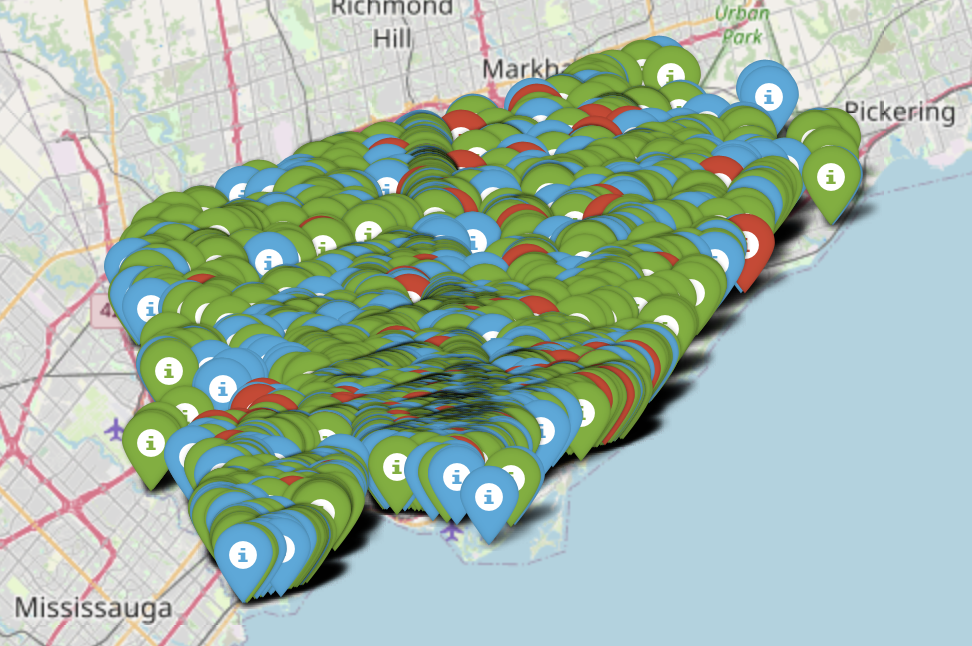

In [1]:
from IPython.display import Image

# Preview of map
Image(filename='Preview.png')